### 데이터 전처리하기: 1. DT 모델에서
여기서 해볼 것: 결측치/레이블(y값) 불균형/노이즈 해결, 인코딩
1. 결측치 확인
2. 결측치 제거
3. 레이블 확인(imbalanced data(불균형한 데이터)인지 확인)
4. 노이즈 제거: 불필요한 컬럼(속성) 제거
5. 인코딩(숫자로 변환): 인코딩하기 전에 레이블 값이 각각 몇 개씩인지 확인해 둔 다음, 인코딩 후 숫자값의 개수를 비교해서 어떤 숫자값이 어떤 레이블 값을 가리키는지 확인해야 함
* 외전. 레이블 불균형 해결하기(균형 맞추기)
6. 만든 데이터로 AI 모델 학습
7. 학습 결과로 Confusion Matrix 만들기
* 궁금한 것: 인코딩할 때 LabelEncoder().fit_transform은 정확히 무슨 역할을 하는 걸까? 그리고 chatGPT는 encoder를 컬럼마다 따로 했던데, 내가 해 보니까 그냥 encoder를 한 번만 선언하고 모든 컬럼에 써도 잘 작동하는데 이러면 문제가 생길 수도 있나?

In [2]:
# 1. 결측치 확인

import pandas as pd

# 데이터 불러오기
df = pd.read_csv("../titanic.csv") # URL로 불러오려면 URL을 적어넣으면 됨

# 결측치 확인
print(df.isnull().sum()) # null인 칸 개수 반환

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# 2. 결측치 제거(아래는 chatGPT가 권장한 처리 방법)
# Cabin 컬럼 제거: 결측치가 너무 많아서 의미 있는 정보가 아닐 가능성이 높아. 그냥 제거하는 게 좋을 것 같아.
# Embarked 컬럼 최빈값 처리: 단 2개의 결측치만 있으니까, 가장 많이 등장하는 값으로 채우는 게 적절해.
# Age 컬럼 평균 or 중앙값 처리: 평균값(혹은 중앙값)으로 채우는 방법이 일반적이야.

df.drop(columns=['Cabin'], inplace=True) # Cabin 컬럼 삭제
    # inplace=True: 변경사항을 df에 덮어쓰겠다는 뜻. 기본적으로 컬럼(열) 변경 함수는 바뀐 결과를 반환해 새 변수에 할당하게 할 뿐, df 자체를 바꾸지는 않음. inplace=True를 쓰면 df 자체가 변화하게 됨.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
    # fillna: 데이터의 결측값을 원하는 값으로 변경하는 메서드
    # mode()[0]: 특정 데이터의 최빈값을 반환. 최빈값은 여러개일 수 있으므로 첫 번째 최빈값([0])만 가져옴.

df['Age'].fillna(df['Age'].mean(), inplace=True) # Age 결측치 채우기 (평균값으로 채우기)
    # mean(): 특정 데이터의 평균값을 반환.

print(df.isnull().sum()) # 결측치 다시 확인


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\jt341\AppData\Local\Temp\ipykernel_15012\2813018870.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
C:\Users\jt341\AppData\Local\Temp\ipykernel_15012\2813018870.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

Survived
0    549
1    342
Name: count, dtype: int64


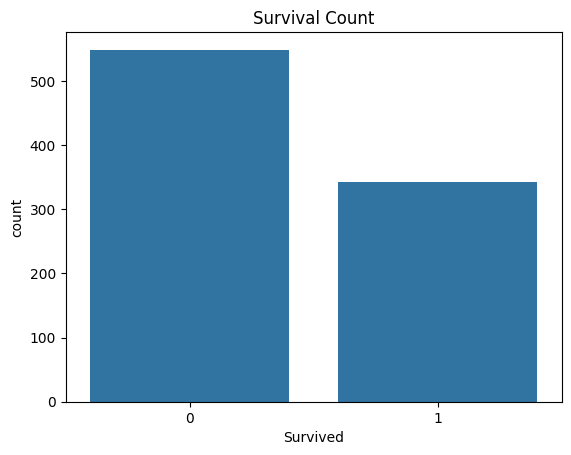

In [4]:
# 3. 레이블 불균형(imbalanced data) 확인

# Survived 값 개수 확인
print(df['Survived'].value_counts())
    # value_counts(): 열의 각 값의 개수를 반환

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Survived'])
plt.title("Survival Count")
plt.show()

In [5]:
# 4. 노이즈 제거: 불필요한 컬럼(속성) 제거
# 보통 삭제하는 컬럼 종류:
    # 1. 레이블(결과)와 아무 관련 없는 컬럼: PassengerID(고객ID), Name, Ticket(티켓번호) 등은 고객의 생존 여부와 아무 관련이 없음
    # 2. 결측치가 너무 많은 컬럼: Cabin은 결측치가 891개 데이터 중 687개나 나옴. but Cabin 유무(0, 1) 같은 식으로 바꿔 사용하기도 함

# 불필요한 컬럼 제거(Cabin은 이미 2. 결측치 제거에서 없앴으므로 여기서는 하지 않음)
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# 결과 확인
print(df_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [6]:
# 5. 인코딩(숫자가 아닌 데이터를 숫자로 변환)
# 인코딩을 하는 이유: 일반적인 AI 모델은 숫자만 다룰 수 있기 때문!

# **인코딩 전: 열의 각 값의 개수 확인(이 개수를 알아둬야 인코딩 후 어떤 숫자가 어떤 값을 가리키는지 알 수 있음)
print(df_cleaned['Sex'].value_counts())  # 성별 개수 확인
print(df_cleaned['Embarked'].value_counts())  # 탑승항구 개수 확인
print("----[위: 변환 전, 아래: 변환 후]----")


# **인코딩: Label Encoding 방법 사용
# 변환 전, 후 값 개수를 비교하며 어떤 값이 어떤 숫자로 바뀌었는지 확인해보자
from sklearn.preprocessing import LabelEncoder

# Sex 컬럼 인코딩
sex_encoder = LabelEncoder()
df_cleaned['Sex'] = sex_encoder.fit_transform(df_cleaned['Sex'])

# Embarked 컬럼 인코딩
embarked_encoder = LabelEncoder()
df_cleaned['Embarked'] = embarked_encoder.fit_transform(df_cleaned['Embarked'])

# 변환 후 확인
print(df_cleaned['Sex'].value_counts())  # 성별 개수 확인
print(df_cleaned['Embarked'].value_counts())  # 탑승항구 개수 확인
print(df_cleaned.head()) # 표 윗부분 확인

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
----[위: 변환 전, 아래: 변환 후]----
Sex
1    577
0    314
Name: count, dtype: int64
Embarked
2    646
0    168
1     77
Name: count, dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [7]:
# 외전. 레이블 불균형 해결하기(균형 맞추기)

# **방법 1. 언더샘플링: 데이터 양이 많은 쪽 개수를 줄임. 데이터가 많을 때만 사용.
from imblearn.under_sampling import RandomUnderSampler

X = df_cleaned.drop(columns=['Survived'])  # 입력 데이터
y = df_cleaned['Survived']  # 레이블

# 언더샘플링 적용
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y) # X_under, y_under가 샘플링 후 결과물

# 결과 확인
print(y_under.value_counts())
print("---------------------")


# **방법 2. 오버샘플링: 데이터 양이 적은 쪽 행을 복사해 늘림. 데이터가 적을 때 사용 but 단순 복사로 늘리기 때문에 과적합 위험 있음.
from imblearn.over_sampling import RandomOverSampler

X = df_cleaned.drop(columns=['Survived'])  # 입력 데이터
y = df_cleaned['Survived']  # 레이블

# 오버샘플링 적용
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y) # X_over, y_over가 샘플링 후 결과물

# 결과 확인
print(y_over.value_counts())
print("---------------------")


# **방법 3. SMOTE: 일반적으로 가장 많이 사용. 기존 데이터 기반으로 새로운 데이터를 생성해 오버샘플링.
# 주의: 얘는 모든 데이터가 숫자일 때만 작동! 인코딩 먼저 해야 함.
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(columns=['Survived'])  # 입력 데이터
y = df_cleaned['Survived']  # 레이블

# SMOTE 적용
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y) # X_smote, y_smote가 샘플링 후 결과물

# 결과 확인
print(y_smote.value_counts())

Survived
0    342
1    342
Name: count, dtype: int64
---------------------
Survived
0    549
1    549
Name: count, dtype: int64
---------------------
Survived
0    549
1    549
Name: count, dtype: int64


(878, 7)
DT 모델 정확도: 0.87


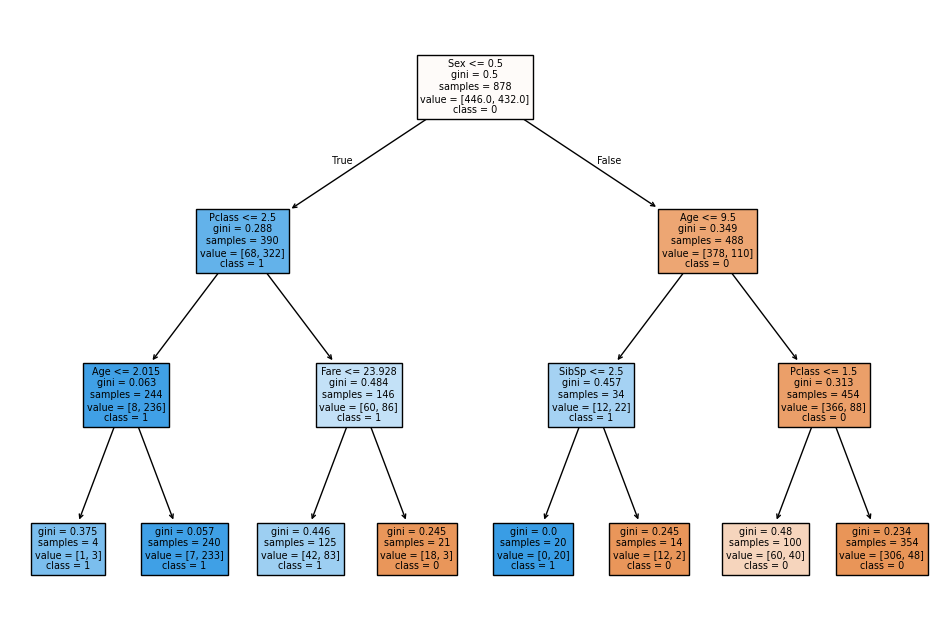

교차 검증 평균 정확도: 0.83


In [11]:
# 6. 만든 데이터로 DT 모델 학습

from sklearn.model_selection import train_test_split  # 데이터 분할 함수
from sklearn.tree import DecisionTreeClassifier  # 의사결정나무 분류기
from sklearn.metrics import accuracy_score  # 정확도 평가 함수
from sklearn import tree  # 의사결정나무 시각화 라이브러리
import matplotlib.pyplot as plt  # 그래프 시각화를 위한 라이브러리

# (1) 위에서 만든 데이터(SMOTE로 불균형 해소까지 한 데이터)를 가져와 train, test 분리(8:2 비율)
X = X_smote # survived를 뺀 모든 컬럼
y = y_smote # survived만 들어 있음(얘가 레이블(예측할 대상))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율

print(X_train.shape)

# (2) 의사결정나무(DT) 모델 생성, 학습(= 훈련)
dt_model = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, max_depth=3, random_state=42)  # DT 모델 생성 ('랜덤 시드 고정'이라는데 무슨 뜻이지?)
    # **max_depth=3: 트리의 최대 깊이를 3으로 제한. 깊이가 줄어든 만큼 조건을 덜 체크하므로 정확도 하락 but 과적합 감소
    # **min_samples_spilt=5: 한 노드에서 샘플이 최소 5개여야만 다음 노드로 넘어감(= 샘플을 나눔). 정확도 하락 but 과적합 감소
    # **min_samples_leaf=2: 최하단 노드(잎)는 샘플이 최소 2개 있어야 함. 샘플을 너무 작게 나누는 걸 방지해 정확도 하락 but 과적합 감소

dt_model.fit(X_train, y_train)  # 학습 데이터로 훈련


# (3) 학습된 모델로 예측 수행, 예측 정확도 평가
y_pred = dt_model.predict(X_test)  # 테스트 데이터 예측

accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print(f"DT 모델 정확도: {accuracy:.2f}")  # 정확도 출력


# (4) 의사결정나무 시각화 (선택 사항)
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in dt_model.classes_], filled=True)
    # [str(cls) for cls in dt_model.classes_]: class_names는 무조건 string 값을 받아야 하기 때문에 dt_model 속 레이블(y)이 가진 값(0, 1)을 string으로 변환
plt.show()


# (5) 교차 검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"교차 검증 평균 정확도: {scores.mean():.2f}")


#### 7. 학습 결과로 Confusion Matrix 만들기
Confusion Matrix(혼동 행렬): 분류 모델의 성능을 평가할 때 쓰는 행렬(표). 4가지 지표 각각의 개수를 구한 다음, 이 4개 지표를 이용해 정확도 등을 구할 수 있음.
1. 실제 1, 예측 1 -> TP (True Positive, 맞은 긍정)
2. 실제 0, 예측 1 -> FP (False Positive, 틀린 긍정)
3. 실제 1, 예측 0 -> FN (False Negative, 틀린 부정)
4. 실제 0, 예측 0 -> TN (True Negative, 맞은 부정)

* 출력 시 구조 예시:

| |실제 1|실제 0|
|---|---|---|
|예측 1|TP|FP|
|예측 0|FN|TN|

* 레이블(y값)이 3개 이상이면 이렇게 나오기도 함:

| |실제 2|실제 1|실제 0|
|---|---|---|---|
|예측 2|T|F|F|
|예측 1|F|T|F|
|예측 0|F|F|T|

이 4가지로 구하는 주요 지표: 정확도, 정밀도, 재현율, F1-score 등
1. 정확도(Accuracy): 전체 샘플 중 맞춘 비율(정답/전체)
2. 정밀도(Precision): 모델이 1이라고 예측한 것 중 실제로 1인 비율(TP/TP+FP)
3. 재현율(Recall, Sensitivity): 실제로 1인 것 중 모델이 1이라고 맞춘 비율(TP/TP+FN)
4. F1-score: 모델의 정밀도, 재현율을 종합한 균형잡힌 성능 수치. 0~1의 값, 클 수록 좋은 성능.


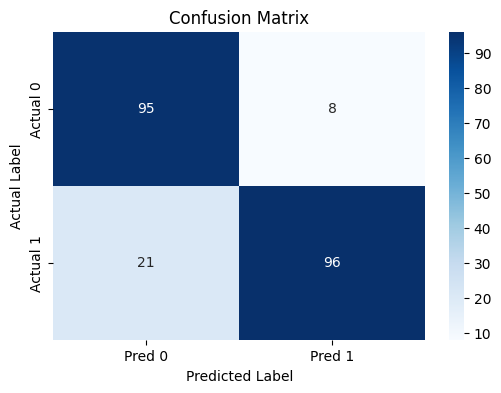

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       103
           1       0.92      0.82      0.87       117

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



In [9]:
# 7. Confusion Matrix 만들기

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측값과 실제값 비교
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 정밀도, 재현율, F1-score 출력
print(classification_report(y_test, y_pred))